# Regression

when two functions closely follow each other, i.e. the rise of one follows the rise of the other. Then a we use regression to find the match similarity between them.

In [2]:
%matplotlib inline

In [3]:
import graphlab

/Library/Python/2.7/site-packages/scipy/__init__.py:110: UserWarning: Numpy 1.8.2 or above is recommended for this version of scipy (detected version 1.8.0rc1)
  UserWarning)


In [4]:
sales=graphlab.SFrame('kc_house_data.gl/')


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1520570734.log


This non-commercial license of GraphLab Create for academic use is assigned to kurianck.mail@gmail.com and will expire on March 07, 2019.


we will use this data to plot a linear regression. That means, we will arrive at the slope and y intercept of a line
which will be most accurate representation for the distribution of data.

In [5]:
import matplotlib.pyplot as plt

In [6]:
a=[]
b=[]

In [35]:
for entry in sales:
    a.append(entry['grade'])
    b.append(entry['price'])

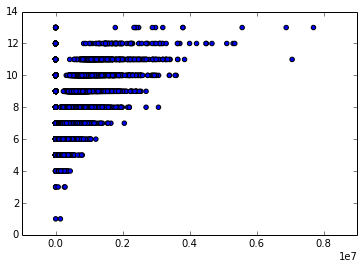

In [36]:
plt.scatter(b,a)
plt.show()

as we can see the price per sq m is closely correlated with grade.

In [37]:
model= graphlab.linear_regression.create(sales,target='price',features=['grade'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 20488

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.019960     | 6044392.115822     | 3902997.521916       | 273597.317217 | 269457.991445   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [38]:
result=model.evaluate(sales)

In [39]:
print result

{'max_error': 6044392.1158224335, 'rmse': 273383.4032601224}


In [40]:
coeff=model['coefficients']

In [41]:
print coeff

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -1056262.39503 | 12584.6240347 |
|    grade    |  None | 208605.406093  | 1624.50147554 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]



# Function to find Linear regression

here we will write a function to find the slope and intercept of the line which will represent the relation ship
between a group of points. Before we do that we need to know the underlying relation ship between the data set and
the regression coefficients.

\begin{align}
    y_{i} = intercept+slope* x_{i} + \varepsilon_{i}
\end{align}
Here $\varepsilon_{i}$ is the error in estimated value $\hat{y}_{i}$ and real value. The best estimate. 
\begin{align}
    \varepsilon_{i}= (intercept+x_{i}*slope)-y_{i}
\end{align}
we define a perfomance function, $h(\epsilon_{i})=\sum^{i=n}_{i=0} \varepsilon_{i}^{2}$, since a good fit(between the unknown function and our regression line) would mean error equals zero, that is our objective with this perfomance function too. We have derived that at optimal level this would mean.

\begin{align}
   slope & =\frac{\sigma^2_{xy}}{\sigma^2_{x}} \\
   intercept & =mean(y)+slope*mean(x)
\end{align}

Here $\sigma_{xy}$ is the cross deviation between x and y, and $\sigma_{x}$ is the standard deviation. We will now write a code that will calculate this and return the answer.

In [42]:
import numpy as np
def linear_regression(data,target):
    mean_x=np.sum(data)/np.size(data)
    mean_y=np.sum(target)/np.size(target)
    deviation_sq=0
    for number in data:
        deviation_sq=deviation_sq+(mean_x-number)**2
        
    cross_deviation_sq=0
    
    for number in target:
        cross_deviation_sq=cross_deviation_sq+(mean_x-number)**2
    
    slope=deviation_sq/cross_deviation_sq
    intercept=mean_y+slope*mean_x
    return (slope,intercept)

In [43]:
mod_data=np.array(a)
mod_target=np.array(b)

linear_regression(mod_data,mod_target)

(8.5030509846055775e-12, 270115.034132534)

# Guess the Criminal

In [ ]:
# https://he-s3.s3.amazonaws.com/media/hackathon/predict-the-criminal/predict-the-criminal/d17428d0-e-Criminal.rar
# dataset from hacker earth
import pandas as pd
pd.read_c